In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('test_data.csv')

In [5]:
data

,alpha,beta,gamma,delta,category
0,0.123030,0.961770,0.896823,0.249546,A
1,0.935262,0.595710,0.536027,0.383397,E
2,0.564859,0.793235,0.307600,0.997222,A
3,0.273371,0.348825,0.452246,0.499595,A
4,0.446372,0.454495,0.555900,0.264152,A
...,...,...,...,...,...
95,0.623661,0.996377,0.880850,0.624013,B
96,0.340979,0.164018,0.738116,0.247733,C
97,0.707766,0.882754,0.121580,0.365758,B
98,0.158622,0.244060,0.032672,0.801727,B


In [7]:
data.head()

,alpha,beta,gamma,delta,category
0,0.123030,0.961770,0.896823,0.249546,A
1,0.935262,0.595710,0.536027,0.383397,E
2,0.564859,0.793235,0.307600,0.997222,A
3,0.273371,0.348825,0.452246,0.499595,A
4,0.446372,0.454495,0.555900,0.264152,A


In [9]:
data.tail()

,alpha,beta,gamma,delta,category
95,0.623661,0.996377,0.880850,0.624013,B
96,0.340979,0.164018,0.738116,0.247733,C
97,0.707766,0.882754,0.121580,0.365758,B
98,0.158622,0.244060,0.032672,0.801727,B
99,0.967617,0.518446,0.693016,0.239999,E


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     100 non-null    float64
 1   beta      100 non-null    float64
 2   gamma     100 non-null    float64
 3   delta     100 non-null    float64
 4   category  100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [13]:
data.describe()

,alpha,beta,gamma,delta
count,100.000000,100.000000,100.000000,100.000000
mean,0.516986,0.545924,0.480302,0.484264
std,0.270822,0.299426,0.306718,0.299767
min,0.005895,0.003800,0.016851,0.006033
25%,0.285416,0.287310,0.192912,0.214979
50%,0.519469,0.588546,0.484919,0.461263
75%,0.710664,0.791194,0.734047,0.766322
max,0.992288,0.996377,0.992480,0.997222


In [15]:
#Dividing the data into X and Y variables
x=data[['alpha', 'beta', 'gamma', 'delta']]
y=data['category']

In [17]:
x

,alpha,beta,gamma,delta
0,0.123030,0.961770,0.896823,0.249546
1,0.935262,0.595710,0.536027,0.383397
2,0.564859,0.793235,0.307600,0.997222
3,0.273371,0.348825,0.452246,0.499595
4,0.446372,0.454495,0.555900,0.264152
...,...,...,...,...
95,0.623661,0.996377,0.880850,0.624013
96,0.340979,0.164018,0.738116,0.247733
97,0.707766,0.882754,0.121580,0.365758
98,0.158622,0.244060,0.032672,0.801727


In [19]:
y

0     A
1     E
2     A
3     A
4     A
     ..
95    B
96    C
97    B
98    B
99    E
Name: category, Length: 100, dtype: object

<Axes: >

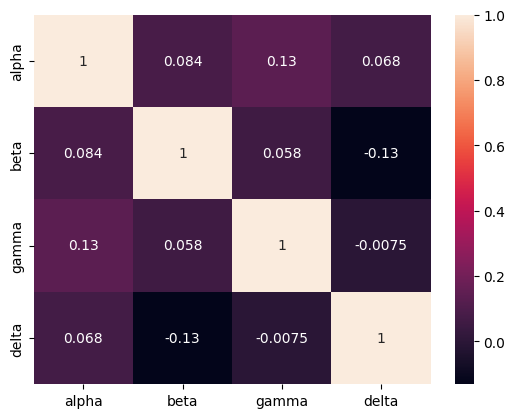

In [21]:
#For generating the heatmap of the data
#x.corr() means finding the correlation between the columns od X
#annot=True means enabling the annotation of the output
sns.heatmap(x.corr(), annot=True)

In [23]:
#Applying the StandardScaler for scaling the dataset
scaler=StandardScaler()

In [25]:
scaler

StandardScaler()

In [27]:
#For fitting X accorfing to the scaler and scaling it
x_scaled=scaler.fit_transform(x)

In [29]:
x_scaled

array([[-1.46199490e+00,  1.39580756e+00,  1.36483766e+00,
        -7.86946322e-01],
       [ 1.55224559e+00,  1.67110203e-01,  1.82599070e-01,
        -3.38181379e-01],
       [ 1.77658141e-01,  8.30110185e-01, -5.65901939e-01,
         1.71980580e+00],
       [-9.04071678e-01, -6.61572583e-01, -9.19305721e-02,
         5.13984989e-02],
       [-2.62053155e-01, -3.06884577e-01,  2.47716073e-01,
        -7.37975419e-01],
       [-1.07419771e+00,  6.90739820e-02, -4.17317642e-01,
        -8.37901645e-01],
       [ 1.63454408e+00, -8.45191350e-01,  1.35840669e+00,
         1.46743630e+00],
       [-1.57409708e+00,  1.77092309e-01, -1.46700845e+00,
        -5.84927009e-01],
       [-6.82842717e-01,  1.13072773e+00, -1.40057131e+00,
         1.61688667e+00],
       [-1.01988849e+00, -1.67767841e+00, -1.31948564e+00,
         6.59842919e-01],
       [ 6.62817658e-02,  4.34111567e-01, -5.53580620e-01,
         3.49407511e-01],
       [ 1.32551899e+00, -1.63102830e+00, -1.23091485e+00,
      

In [31]:
#Transposing the features on the scaled data of X
features=x_scaled.T

In [33]:
features

array([[-1.46199490e+00,  1.55224559e+00,  1.77658141e-01,
        -9.04071678e-01, -2.62053155e-01, -1.07419771e+00,
         1.63454408e+00, -1.57409708e+00, -6.82842717e-01,
        -1.01988849e+00,  6.62817658e-02,  1.32551899e+00,
        -1.32506052e+00, -1.42598654e+00,  9.12715279e-01,
        -1.37230531e+00,  1.04086727e+00,  2.59586192e-01,
        -9.91650293e-01,  1.73196228e+00,  1.59251495e-01,
        -1.76869514e-01, -8.30095599e-01, -1.88824581e-01,
         6.05240062e-01,  1.64319735e+00,  5.06851212e-01,
        -1.89669005e+00, -8.44469315e-01,  2.34306855e-01,
         1.95010541e-01, -1.46082812e-01, -7.41524587e-01,
        -1.17896642e+00,  3.49549788e-01, -1.21456169e+00,
        -9.63537297e-01, -3.33941244e-02,  1.75069941e+00,
        -5.60713312e-01,  5.18224132e-02, -1.48956935e-01,
        -3.99090592e-01,  7.26338454e-01, -1.31028437e+00,
         1.33995530e+00, -1.05865193e+00, -1.80375542e-01,
        -9.13561515e-01, -9.36206437e-01, -1.08368633e+0

In [35]:
covariance_matrix=np.cov(features)

In [37]:
covariance_matrix

array([[ 1.01010101,  0.08516951,  0.13620912,  0.06903187],
       [ 0.08516951,  1.01010101,  0.05809566, -0.13312479],
       [ 0.13620912,  0.05809566,  1.01010101, -0.0075945 ],
       [ 0.06903187, -0.13312479, -0.0075945 ,  1.01010101]])

In [39]:
#linalg stands for Linear Algebra
#eig stands for eigen
values, vectors=np.linalg.eig(covariance_matrix)

In [41]:
values

array([0.80627212, 0.90537329, 1.20522427, 1.12353436])

In [43]:
vectors

array([[-0.58371076,  0.38268715,  0.57077478,  0.43249097],
       [ 0.53280044,  0.47167812,  0.55504278, -0.43077947],
       [ 0.25889706, -0.73807252,  0.57144163,  0.24834599],
       [ 0.55531771,  0.29380136, -0.19899278,  0.75213355]])

In [45]:
#Print the shape of the eigen values
values.shape

(4,)

In [47]:
#Print the shape of the eigen vectors
vectors.shape

(4, 4)

In [49]:
#For calculating the percentage contribution of the eigen values
percentage_variance=[]
for i in range(len(values)):
    percentage_variance.append(values[i]/np.sum(values))

In [51]:
percentage_variance

[np.float64(0.19955235030766802),
 np.float64(0.22407988900876757),
 np.float64(0.2982930078043123),
 np.float64(0.27807475287925204)]

In [53]:
#Since 1st and 2nd vectors are maxing most of the contributions, we will take only the first 2 rows of the eigen vectors
#PC1 and PC2 will have 1st and 2nd vectors
proj_1=x_scaled.dot(vectors.T[2])
proj_2=x_scaled.dot(vectors.T[3])
result=pd.DataFrame(proj_1, columns=['PC1'])
result['PC2']=proj_2

In [55]:
result

,PC1,PC2
0,0.876785,-1.486522
1,1.150376,0.390335
2,-0.103459,0.872225
3,-0.945983,-0.090183
4,-0.031500,-0.474673
...,...,...
95,1.721939,0.198246
96,-0.443758,-0.116941
97,0.438996,-0.771583
98,-2.371436,0.297579
